In [1]:
import tensorflow.keras as keras

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 370s 2us/step


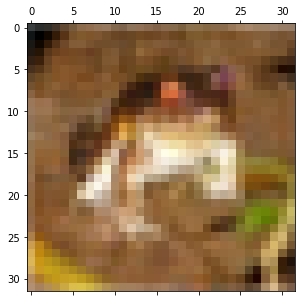

In [4]:
import matplotlib.pyplot as plt

plt.matshow(x_train[0])

In [5]:
y_train[0]

array([6], dtype=uint8)